In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_excel('Sea_Ice_Index_Monthly_Data_by_Year_G02135_v3.0.xlsx')
df.describe()

,Unnamed: 0,January,February,March,April,May,June,July,August,September,October,November,December,Unnamed: 13,Annual
count,47.000000,45.000000,46.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,46.000000,45.000000,0.0,47.000000
mean,2001.000000,14.181978,15.059326,15.224289,14.500067,13.106622,11.513111,9.058667,6.746578,5.933178,7.828200,10.425696,12.631756,NaN,11.413957
std,13.711309,0.600936,0.607610,0.568598,0.561582,0.508947,0.624306,0.950147,1.037186,1.155103,1.165679,0.754690,0.626208,NaN,0.841306
min,1978.000000,13.077000,13.967000,14.290000,13.434000,11.924000,10.413000,7.294000,4.723000,3.566000,5.334000,8.658000,11.459000,NaN,10.150000
25%,1989.500000,13.661000,14.523000,14.687000,13.992000,12.780000,10.920000,8.183000,5.875000,4.865000,6.920000,9.784750,12.045000,NaN,10.686000
50%,2001.000000,14.203000,15.174000,15.260000,14.512000,13.044000,11.583000,9.247000,6.855000,6.116000,8.162000,10.372500,12.608000,NaN,11.508000
75%,2012.500000,14.725000,15.545250,15.598000,15.010000,13.510000,12.084000,9.925000,7.639000,7.008000,8.786000,11.062500,13.222000,NaN,11.981000
max,2024.000000,15.414000,16.175000,16.342000,15.466000,14.073000,12.530000,10.570000,8.186000,7.667000,9.484000,11.645000,13.667000,NaN,14.250000


In [7]:
npds = np.array(df[['Unnamed: 0','Annual']])
newds = np.delete(npds, (0), axis = 0)
newds = np.delete(newds, (-1), axis = 0)

In [8]:
print(newds[:5])
print(newds[-1])

[[1979.      12.328]
 [1980.      12.337]
 [1981.      12.127]
 [1982.      12.447]
 [1983.      12.332]]
[2023.     10.47]


In [9]:
x = newds[:,0].reshape(-1,1)
y = newds[:,1].reshape(-1,1)

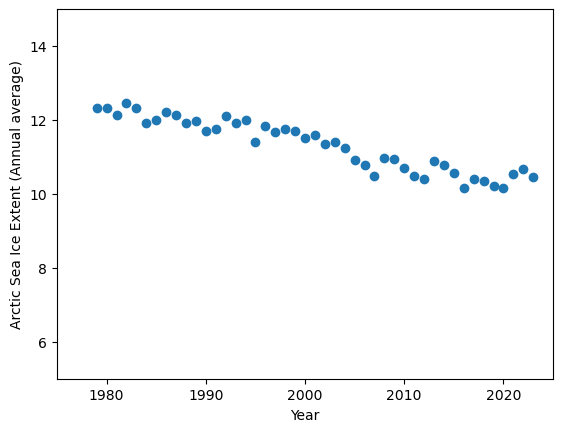

In [10]:
plt.scatter(x, y)
plt.xlim(1975, 2025)
plt.ylim(5,15)
plt.xlabel('Year')
plt.ylabel('Arctic Sea Ice Extent (Annual average)')
plt.show()

In [11]:
model = LinearRegression()
model.fit(x, y)
r2 = model.score(x, y)

print("Coefficient of determination: ", r2)
print("Intercept: ", model.intercept_)

Coefficient of determination:  0.9005626909348424
Intercept:  [114.84425556]


In [12]:
y_pred = model.predict(x)
# print(y_pred)

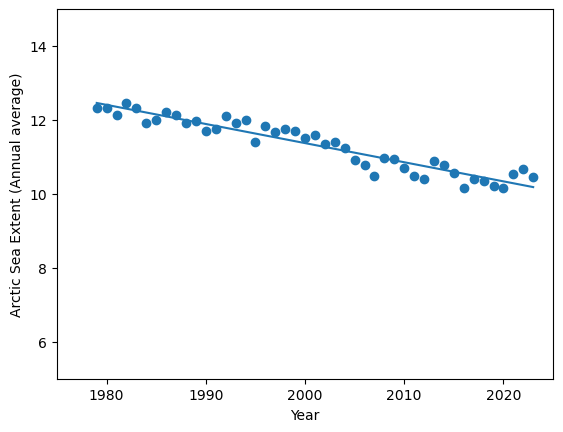

In [13]:
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.xlim(1975, 2025)
plt.ylim(5,15)
plt.xlabel('Year')
plt.ylabel('Arctic Sea Extent (Annual average)')
plt.show()

In [14]:
y_pred = model.intercept_ + model.coef_ * x

In [15]:
y_2030 = model.intercept_ + model.coef_ * 2030
y_2040 = model.intercept_ + model.coef_ * 2040

In [16]:
y_2030

array([[9.82264686]])

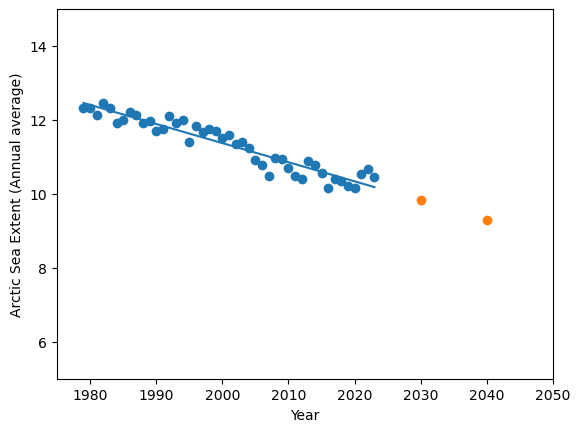

In [17]:
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.scatter([2030, 2040], [y_2030, y_2040])
plt.xlim(1975, 2050)
plt.ylim(5,15)
plt.xlabel('Year')
plt.ylabel('Arctic Sea Extent (Annual average)')
plt.show()

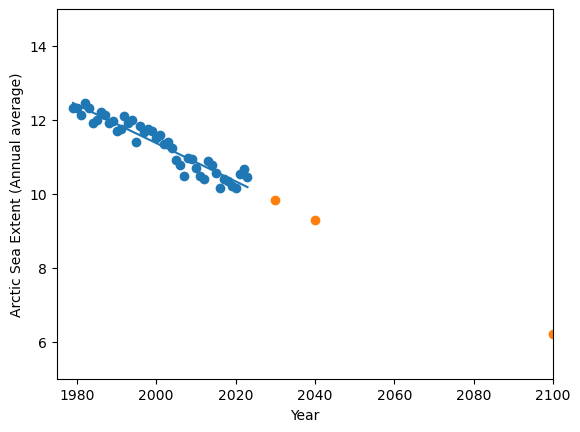

In [18]:
y_2100 = model.intercept_ + model.coef_ * 2100
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.scatter([2030, 2040, 2100], [y_2030, y_2040, y_2100])
plt.xlim(1975, 2100)
plt.ylim(5,15)
plt.xlabel('Year')
plt.ylabel('Arctic Sea Extent (Annual average)')
plt.show()

In [19]:
df

,Unnamed: 0,January,February,March,April,May,June,July,August,September,October,November,December,Unnamed: 13,Annual
0,1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.645,13.667,NaN,12.673
1,1979,15.414,16.175,16.342,15.447,13.857,12.530,10.311,8.041,7.051,8.748,10.943,13.336,NaN,12.328
2,1980,14.862,15.955,16.041,15.429,13.793,12.205,10.100,7.984,7.667,9.183,11.383,13.593,NaN,12.337
3,1981,14.910,15.604,15.632,15.010,13.802,12.430,10.271,7.844,7.138,8.856,10.929,13.341,NaN,12.127
4,1982,15.177,15.974,16.044,15.466,13.973,12.476,10.367,8.139,7.302,9.421,11.627,13.642,NaN,12.447
5,1983,14.942,16.006,16.085,15.172,13.491,12.296,10.570,8.186,7.395,9.334,11.461,13.299,NaN,12.332
6,1984,14.473,15.299,15.584,15.015,13.577,12.152,9.977,7.771,6.805,8.561,10.842,12.989,NaN,11.910
7,1985,14.725,15.466,15.886,15.357,14.073,12.219,9.744,7.402,6.698,8.546,11.025,13.050,NaN,11.995
8,1986,14.890,15.785,15.910,15.059,13.379,11.976,10.146,7.979,7.411,9.484,11.453,13.222,NaN,12.203
9,1987,14.970,16.050,15.816,15.211,13.743,12.486,10.333,7.628,7.279,9.049,11.224,NaN,NaN,12.135
